In [18]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.decomposition import PCA

# Получение дата-фрейма из csv файла

In [19]:
data_frame = pd.DataFrame(pd.read_csv('Botanic_data.csv'))
data_frame = data_frame[0:10000]
data_frame
# понял что данных очень много

,obr,450nm,454nm,458nm,462nm,466nm,470nm,474nm,478nm,482nm,...,966nm,970nm,974nm,978nm,982nm,986nm,990nm,994nm,998nm,1000nm
0,1,0,2,93,95,98,102,101,101,99,...,106,104,103,101,99,96,94,94,95,96
1,1,0,2,90,94,98,100,102,103,98,...,108,107,104,102,100,99,98,96,95,93
2,1,0,2,94,95,99,101,102,102,98,...,110,108,104,100,97,96,95,94,93,91
3,1,0,2,94,96,99,102,101,100,99,...,107,104,101,98,95,94,94,93,91,91
4,1,0,2,93,97,98,101,102,101,99,...,98,97,97,96,96,96,95,95,94,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,3,3,91,98,100,102,102,100,97,...,84,83,82,81,80,79,80,81,82,83
9996,1,3,3,89,99,95,102,98,95,98,...,80,80,80,79,79,80,81,83,84,85
9997,1,3,2,94,100,99,96,98,99,102,...,81,80,80,79,79,79,80,80,81,81
9998,1,3,2,86,100,101,98,100,103,111,...,83,81,79,77,75,73,71,70,71,71


# Работа с дата-фреймом
## (вынесение признака, нормализация, снижение размерности)

In [20]:
data_frame_attribute = data_frame[['obr']]
data_frame_attribute.head()

,obr
0,1
1,1
2,1
3,1
4,1


In [21]:
data_frame = data_frame.drop(columns=['obr'])
data_frame.head()

,450nm,454nm,458nm,462nm,466nm,470nm,474nm,478nm,482nm,486nm,...,966nm,970nm,974nm,978nm,982nm,986nm,990nm,994nm,998nm,1000nm
0,0,2,93,95,98,102,101,101,99,99,...,106,104,103,101,99,96,94,94,95,96
1,0,2,90,94,98,100,102,103,98,98,...,108,107,104,102,100,99,98,96,95,93
2,0,2,94,95,99,101,102,102,98,99,...,110,108,104,100,97,96,95,94,93,91
3,0,2,94,96,99,102,101,100,99,100,...,107,104,101,98,95,94,94,93,91,91
4,0,2,93,97,98,101,102,101,99,100,...,98,97,97,96,96,96,95,95,94,94


In [30]:
scaler = MaxAbsScaler()
normalized_data_set = scaler.fit_transform(data_frame)
normalized_data_frame = pd.DataFrame(normalized_data_set)
data_save = normalized_data_frame
normalized_data_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0.0,0.333333,0.762295,0.931373,0.852174,0.935780,0.926606,0.935185,0.891892,0.916667,...,0.883333,0.866667,0.887931,0.870690,0.860870,0.834783,0.817391,0.824561,0.855856,0.857143
1,0.0,0.333333,0.737705,0.921569,0.852174,0.917431,0.935780,0.953704,0.882883,0.907407,...,0.900000,0.891667,0.896552,0.879310,0.869565,0.860870,0.852174,0.842105,0.855856,0.830357
2,0.0,0.333333,0.770492,0.931373,0.860870,0.926606,0.935780,0.944444,0.882883,0.916667,...,0.916667,0.900000,0.896552,0.862069,0.843478,0.834783,0.826087,0.824561,0.837838,0.812500
3,0.0,0.333333,0.770492,0.941176,0.860870,0.935780,0.926606,0.925926,0.891892,0.925926,...,0.891667,0.866667,0.870690,0.844828,0.826087,0.817391,0.817391,0.815789,0.819820,0.812500
4,0.0,0.333333,0.762295,0.950980,0.852174,0.926606,0.935780,0.935185,0.891892,0.925926,...,0.816667,0.808333,0.836207,0.827586,0.834783,0.834783,0.826087,0.833333,0.846847,0.839286


In [31]:
scaled = normalized_data_frame.to_numpy()
pca = PCA(n_components=139)
pca.fit(scaled)

PCA(n_components=139)

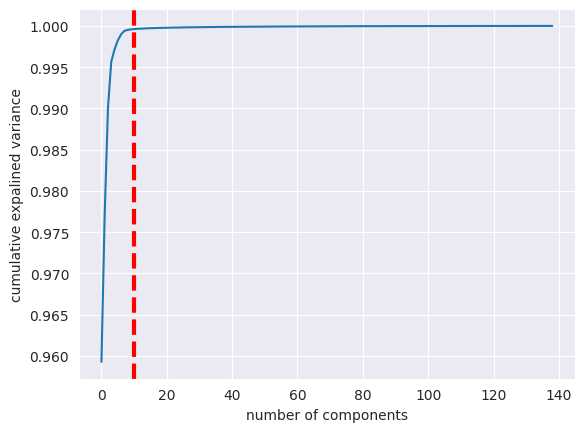

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative expalined variance')
plt.axvline(linewidth=3, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
plt.show()
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_data_frame = pd.DataFrame()
pca_data_frame['Cumulative Variance Ratio'] = cvr
pca_data_frame['Explained Variance Ratio'] = evr

In [33]:
pca_main = PCA(n_components=139)
pca_main.fit(scaled)
train = pca.transform(scaled)
data_pca = pd.DataFrame(train)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,6.048858,-0.220849,-0.498715,-0.401500,0.161863,-0.057964,-0.148567,0.019625,-0.120209,0.049274,...,0.001509,-0.003042,0.001079,0.004067,0.001378,-0.001086,-0.000745,-0.000783,-0.000603,-0.002278
1,6.117453,-0.201046,-0.497617,-0.450792,0.157664,-0.081176,-0.159860,0.071334,-0.094541,0.035609,...,-0.003909,0.002137,-0.001968,-0.001228,0.002727,0.001715,-0.003881,0.003030,0.001005,-0.001981
2,6.154821,-0.182593,-0.496134,-0.438692,0.147132,-0.122088,-0.205549,0.120098,-0.122196,0.044761,...,-0.000763,0.003730,-0.002478,0.000150,-0.000679,0.004099,-0.000398,-0.000601,-0.001046,-0.004932
3,6.110198,-0.170310,-0.495809,-0.378172,0.156102,-0.114474,-0.199191,0.090374,-0.097298,0.028834,...,0.001855,0.001037,0.000715,-0.002184,0.004694,-0.001867,0.000096,0.000552,-0.001350,-0.000539
4,6.023123,-0.167047,-0.496050,-0.326856,0.165422,-0.073652,-0.157902,-0.013729,-0.002623,-0.042038,...,0.004448,0.005000,0.000951,0.000841,-0.001202,0.001295,0.000775,0.000047,-0.000220,-0.000474


In [34]:
data_pca = pd.concat([data_pca, data_frame_attribute], axis=1)
data_save = pd.concat([data_save, data_frame_attribute], axis=1)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,obr
0,6.048858,-0.220849,-0.498715,-0.401500,0.161863,-0.057964,-0.148567,0.019625,-0.120209,0.049274,...,-0.003042,0.001079,0.004067,0.001378,-0.001086,-0.000745,-0.000783,-0.000603,-0.002278,1
1,6.117453,-0.201046,-0.497617,-0.450792,0.157664,-0.081176,-0.159860,0.071334,-0.094541,0.035609,...,0.002137,-0.001968,-0.001228,0.002727,0.001715,-0.003881,0.003030,0.001005,-0.001981,1
2,6.154821,-0.182593,-0.496134,-0.438692,0.147132,-0.122088,-0.205549,0.120098,-0.122196,0.044761,...,0.003730,-0.002478,0.000150,-0.000679,0.004099,-0.000398,-0.000601,-0.001046,-0.004932,1
3,6.110198,-0.170310,-0.495809,-0.378172,0.156102,-0.114474,-0.199191,0.090374,-0.097298,0.028834,...,0.001037,0.000715,-0.002184,0.004694,-0.001867,0.000096,0.000552,-0.001350,-0.000539,1
4,6.023123,-0.167047,-0.496050,-0.326856,0.165422,-0.073652,-0.157902,-0.013729,-0.002623,-0.042038,...,0.005000,0.000951,0.000841,-0.001202,0.001295,0.000775,0.000047,-0.000220,-0.000474,1


In [39]:
data_pca.to_csv('Csv/My_PCA_data.csv', index=False)
data_save.to_csv('Csv/My_Normalize_data.csv', index=False)

In [41]:
for i in range(10):
    data_tmp = data_pca.sample(frac=1).reset_index(drop=True)
    temp=pd.DataFrame(data_tmp[0:5000].values)
    temp.to_csv(f'Variant/variant_{i+1}.csv', index=False)